In [2]:
import numpy as np
import numpy.linalg as la
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

In [3]:
r_init=np.array([1.32745344,0.23925211])
stop=1e-06

In [4]:
def f(r):
    x, y = r
    return 3 +((x**2)/8) + ((y**2)/8) - np.sin(x)*np.cos((2**-0.5)*y)
def gf(r):
    x,y=r
    return np.array([x/4-np.cos(x)*np.cos((2**-0.5)*y),y/4+(2**-0.5)*np.sin(x)*np.sin((2**-0.5)*y)])
def H(r):
    x,y=r
    return np.array([[1./4+np.sin(x)*np.cos((2**-0.5)*y),(2**-0.5)*np.cos(x)*np.sin((2**-0.5)*y)],[(2**-0.5)*np.cos(x)*np.sin((2**-0.5)*y),1./4+(2**-1)*np.sin(x)*np.cos((2**-0.5)*y)]])

In [24]:
n=[r_init]
def ND_Newton(X,tol):
    i=0
    step=np.array([1,1])
    while la.norm(gf(X),2)>tol:
        step=la.solve(H(X),-gf(X))
        X=X+step
        i+=1
        n.append(X)
    return X,i
r_newton,iteration_count_newton=ND_Newton(r_init,stop)
n=np.array(n)
n=n-r_newton
y_n=[]
for i in n:
    y_n.append(np.log(la.norm(i,2)))
y_n=np.array(y_n)

<ipython-input-24-2a02487f2bc1>:16: RuntimeWarning: divide by zero encountered in log
  y_n.append(np.log(la.norm(i,2)))


In [26]:
s=[r_init]
def Steepest(x0,tol):
    i=0
    step=np.array([1,1])
    while la.norm(gf(x0),2)>tol:
        gra=gf(x0)
        def alphaf(a):
            return f(x0-a*gra)
        alpha=minimize_scalar(alphaf)
        step=alpha.x*gra
        x0=x0-step
        s.append(x0)
        i+=1
    return x0,i
r_sd,iteration_count_sd=Steepest(r_init,stop)
s=np.array(s)
s=s-r_sd
y_s=[]
for i in s:
    y_s.append(np.log(la.norm(i,2)))
y_s=np.array(y_s)

<ipython-input-26-7fc40a8d38d4>:20: RuntimeWarning: divide by zero encountered in log
  y_s.append(np.log(la.norm(i,2)))


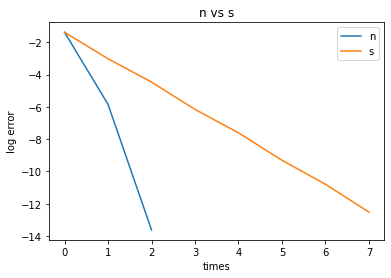

In [34]:
plt.plot(np.array(range(iteration_count_newton+1)),y_n)
plt.plot(np.array(range(iteration_count_sd+1)),y_s)
plt.xlabel('times')
plt.ylabel('log error')
plt.legend('ns')
plt.title('n vs s')
plt.show()